### 하이퍼파라미터
* 예측력을 높이기 위해 사용
* 과대/과소 적합을 방지하기 위해 사용
* 사용자가 지정하는 파라미터

#### 하이퍼파라미터 튜닝
* 특정 알고리즘의 매개변수 값을 변경하면서 최적의 파라미터를 찾는 방식
* GridSearchCV클래스를 통해 하이퍼파라미터 탐색과 교차 검증을 한번에 수행

#### GridSearchCV
* 교차 검증으로 하이퍼파라미터 탐색을 수행한다
* 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련한다
* 매개변수
    - GridSearchCV(모델, param_grid = 파라미터, cv=반복횟수, n_jobs=코어 수(-1, 모든 코어 사용))

### K-최근접 이웃 알고리즘
* 주위에서 가장 가까운 다른 데이터를 보고 현재 데이터를 판단

#### 하이퍼파라미터
* n_neighbors
    - 기본 가까운 5개의 데이터를 보고 자기 자신이 어디에 속하는지를 판단
    - 비교하고자 하는 데이터의 수가 적을 수록 과대 적합이 된다
* metric : 거리계산 척도
    - euclidean(녹색) : 유클리디안 거리 측정
        * 목표 지점까지 가장 짧은 거리
    - manhattan(빨간색) : 맨하튼 거리 측정 방법
        * 찾아가는 경로의 모든 길이의 합
* weights : 가중치
    - uniform : 거리에 가중치 부여하지 않음(균일한 가중치)
    - distance : 거리에 가중치 부여(가까이 있는 데이터에 가중치)

![img](images/거리척도.png)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/titanic_cleaning.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
label = 'Survived'

X = df[features]
y = df[label]
X,y

(     Pclass  Sex        Age  SibSp  Parch     Fare
 0         3    0  22.000000      1      0   7.2500
 1         1    1  38.000000      1      0  71.2833
 2         3    1  26.000000      0      0   7.9250
 3         1    1  35.000000      1      0  53.1000
 4         3    0  35.000000      0      0   8.0500
 ..      ...  ...        ...    ...    ...      ...
 886       2    0  27.000000      0      0  13.0000
 887       1    1  19.000000      0      0  30.0000
 888       3    1  29.699118      1      2  23.4500
 889       1    0  26.000000      0      0  30.0000
 890       3    0  32.000000      0      0   7.7500
 
 [891 rows x 6 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

### min max scaler

In [5]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_scaler = minMaxScaler.transform(X)

In [6]:
X_train_minMax,X_test_minMax,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2)

### knn 모델 생성

In [8]:
kn = KNeighborsClassifier()
kn.fit(X_train_minMax,y_train)
print("train : ",kn.score(X_train_minMax,y_train))
print("test : ",kn.score(X_test_minMax,y_test))

train :  0.8693820224719101
test :  0.7988826815642458


In [13]:
k_param = range(1,20)
for i in k_param:
    print(i,end=", ")

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 

In [14]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train_minMax,y_train)
print("train : ",kn.score(X_train_minMax,y_train))
print("test : ",kn.score(X_test_minMax,y_test))

train :  0.9747191011235955
test :  0.7541899441340782


In [15]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train_minMax,y_train)
print("train : ",kn.score(X_train_minMax,y_train))
print("test : ",kn.score(X_test_minMax,y_test))

train :  0.8932584269662921
test :  0.7597765363128491


In [18]:
dic = {"k":k_param,"다른":k_param}
pd.DataFrame(dic)

,k,다른
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [21]:
test = []
test.append(100); test.append(200); test.append("안녕"); test.append("하세요")
test

[100, 200, '안녕', '하세요']

In [35]:
k_param = range(1,11)
train_list = []
test_list = []
num_list = []

for num in k_param:
    kn = KNeighborsClassifier(n_neighbors=num)
    kn.fit(X_train_minMax,y_train)
    
    num_list.append(num)
    train_list.append(kn.score(X_train_minMax,y_train))
    test_list.append(kn.score(X_test_minMax,y_test))

dic = {"num" : num_list,"train score":train_list,"test score":test_list}

In [29]:
num_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
train_list

[0.9747191011235955,
 0.8918539325842697,
 0.8932584269662921,
 0.8764044943820225,
 0.8693820224719101,
 0.8539325842696629,
 0.8497191011235955,
 0.8412921348314607,
 0.8497191011235955,
 0.8469101123595506]

In [34]:
test_list

[0.7541899441340782,
 0.8100558659217877,
 0.7597765363128491,
 0.776536312849162,
 0.7988826815642458,
 0.8044692737430168,
 0.770949720670391,
 0.7988826815642458,
 0.7821229050279329,
 0.7932960893854749]

In [37]:
score_df = pd.DataFrame(dic)
score_df

,num,train score,test score
0,1,0.974719,0.754190
1,2,0.891854,0.810056
2,3,0.893258,0.759777
3,4,0.876404,0.776536
4,5,0.869382,0.798883
5,6,0.853933,0.804469
6,7,0.849719,0.770950
7,8,0.841292,0.798883
8,9,0.849719,0.782123
9,10,0.846910,0.793296


<Axes: xlabel='num', ylabel='train score'>

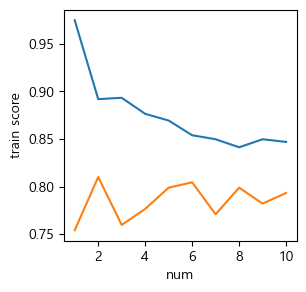

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family="Malgun Gothic")
plt.subplots(figsize=(3,3))

sns.lineplot(x="num",y="train score",data=score_df)
sns.lineplot(x="num",y="test score",data=score_df)

### 5 GridSearchCV

* GridSearchCV( 모델 , param_grid=파라미터 , cv=폴드 수, n_jobs=코어수 )

In [41]:
from sklearn.model_selection import GridSearchCV

k_param = range(1,11)
params = {"n_neighbors": k_param}
knn = KNeighborsClassifier()

grid_cv = GridSearchCV(knn,param_grid=params,cv=5,n_jobs=-1)
grid_cv.fit(X_train_minMax,y_train)

print("최적의 하이퍼 파라미터 : ",grid_cv.best_params_)
print("예측력 : ", grid_cv.best_score_)

print("train : ",grid_cv.score(X_train_minMax,y_train))
print("test : ",grid_cv.score(X_test_minMax,y_test))

최적의 하이퍼 파라미터 :  {'n_neighbors': 7}
예측력 :  0.8356938835812077
train :  0.8497191011235955
train :  0.770949720670391


In [43]:
params = {
    "n_neighbors": range(1,50),
    "metric": ["mangatten","euclidean"],
    "weights" : ["uniform","distance"]
}
grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_minMax,y_train)

print("최적의 하이퍼 파라미터: ",grid_cv.best_params_)

print("train : ", grid_cv.score(X_train_minMax,y_train))
print("test : ", grid_cv.score(X_test_minMax,y_test))

최적의 하이퍼 파라미터:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
train :  0.8497191011235955
test :  0.770949720670391
